In [1]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# 設定 data_path
dir_data = './'

path = os.path.join(dir_data, 'diamond.csv')
print('Path of read in data: %s' % (path))
csv = pd.read_csv(path)
df = DataFrame(csv)
df

Path of read in data: ./diamond.csv


,GIA Number,Shape,Carat,Color,Clarity,Cut,Price
0,6302897816,round,1.10,D,FL,EX,531247
1,6193605114,round,1.27,D,FL,EX,628587
2,5182557488,round,2.47,D,FL,EX,2606712
3,1315220514,round,0.30,D,IF,EX,22929
4,6305138197,round,0.31,D,IF,EX,23727
5,7302961760,round,0.31,D,IF,EX,23727
6,6305318234,round,0.33,D,IF,EX,25322
7,1305907144,round,0.34,D,IF,EX,26120
8,6311230567,round,0.34,D,IF,EX,26120
9,7311286294,round,0.37,D,IF,EX,29825


Color: D, E, F, G, H, I, J

round       583
heart        17
radiant      12
pear          9
oval          7
cushion       6
princess      5
emerald       1
marquise      1
Name: Shape, dtype: int64
['round', 'heart', 'radiant', 'pear', 'oval', 'cushion', 'princess', 'emerald', 'marquise']
(583, 1)


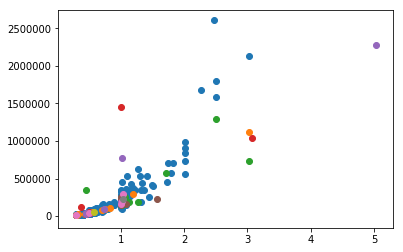

In [3]:
d_s = df['Shape']
print(d_s.value_counts())
print(d_s.value_counts().index.tolist())

for keys in d_s.value_counts().index.tolist():
    d_x = df.loc[df['Shape'] == keys, ['Carat']]
    d_y = df.loc[df['Shape'] == keys, ['Price']]
    plt.scatter(d_x, d_y)
    
d_x = df.loc[df['Shape'] == 'round', ['Carat']]
d_y = df.loc[df['Shape'] == 'round', ['Price']]
print(d_x.shape)

In [15]:
d_co = df['Color']
print(d_co.value_counts())

d_co = df.loc[df['Shape'] == 'round', ['Color']]
print(d_co.select_dtypes(include=["object"]).apply(pd.Series.nunique))
print(d_co.apply(pd.Series.value_counts))
# d_co_Series = d_co.iloc[:,0]
# print(d_co_Series.value_counts())
# print(d_co_Series.value_counts().index.tolist())
# print(d_co.shape)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(d_co)
print('\ninteger_encoded\n', integer_encoded)
integer_encoded = integer_encoded[:, np.newaxis]
print('\ninteger_encoded\n', integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('\nonehot_encoded\n', onehot_encoded)

d_co_onehot = onehot_encoded

D                       268
E                       150
F                       128
G                        41
H                        22
Fancy Yellow             10
Fancy Intense Yellow      6
I                         5
F.L Greenish Yellow       2
Fancy Yellow Green        1
F.L Pink-Brown            1
J                         1
Light Pink                1
K                         1
L                         1
F.L Purplish Pink         1
Very Light Pink           1
Fancy Greenish Yello      1
Name: Color, dtype: int64
Color    9
dtype: int64
   Color
D    240
E    146
F    126
G     41
H     22
I      5
J      1
K      1
L      1

integer_encoded
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
d_cl = df.loc[df['Shape'] == 'round', ['Clarity']]
print(d_cl.select_dtypes(include=["object"]).apply(pd.Series.nunique))
print(d_cl.apply(pd.Series.value_counts))
# d_cl_Series = d_cl.iloc[:,0]
# print(d_cl_Series.value_counts())
# print(d_cl_Series.value_counts().index.tolist())
# print(d_cl.shape)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(d_cl)
print('\ninteger_encoded\n', integer_encoded)
integer_encoded = integer_encoded[:, np.newaxis]
print('\ninteger_encoded\n', integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('\nonehot_encoded\n', onehot_encoded)

d_cl_onehot = onehot_encoded
print(d_cl_onehot.shape)

Clarity    8
dtype: int64
      Clarity
VS2       155
VS1       120
SI1       114
VVS2       77
SI2        50
VVS1       40
IF         24
FL          3

integer_encoded
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 6 6 6 7 7 7 7 7 7 7 7 7 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 6 7 7 7 7 7 7 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 

/Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
print(d_x.describe())
print(d_y.describe())
# x_train = np.hstack((d_co_onehot, d_cl_onehot, d_x.values))
x_train = d_x.values
y_train = d_y.values/10000
print(x_train.shape)
print(x_train[:5])
print(y_train.shape)
print(y_train[:5])

            Carat
count  583.000000
mean     0.558971
std      0.354488
min      0.300000
25%      0.330000
50%      0.500000
75%      0.600000
max      3.030000
              Price
count  5.830000e+02
mean   8.960188e+04
std    2.143362e+05
min    9.699000e+03
25%    1.601600e+04
50%    3.638300e+04
75%    6.161200e+04
max    2.606712e+06
(583, 1)
[[1.1 ]
 [1.27]
 [2.47]
 [0.3 ]
 [0.31]]
(583, 1)
[[ 53.1247]
 [ 62.8587]
 [260.6712]
 [  2.2929]
 [  2.3727]]


In [7]:
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

layer1 = tf.layers.dense(x, 20, tf.nn.relu)
layer2 = tf.layers.dense(layer1, 40, tf.nn.relu)

hypothesis = tf.layers.dense(layer2, 1)

loss = tf.losses.mean_squared_error(y, hypothesis)

train = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

W0206 23:48:05.347213 4645885376 deprecation.py:323] From <ipython-input-7-a0935c09e894>:4: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0206 23:48:05.350428 4645885376 deprecation.py:506] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1253: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

epoch: 0 loss:540.275695801


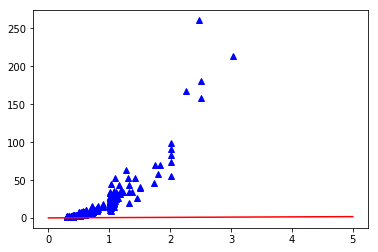

epoch: 100 loss:72.435905457


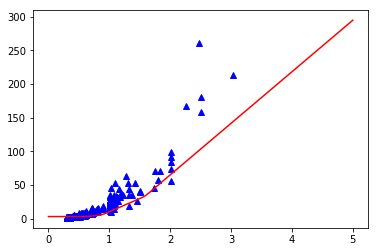

epoch: 200 loss:68.053047180


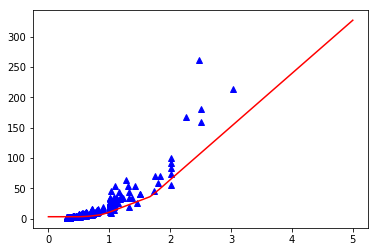

epoch: 300 loss:64.055549622


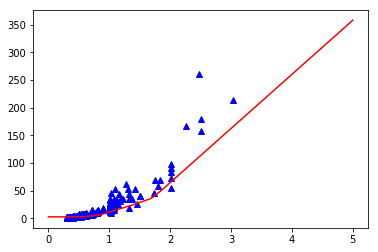

epoch: 400 loss:60.524711609


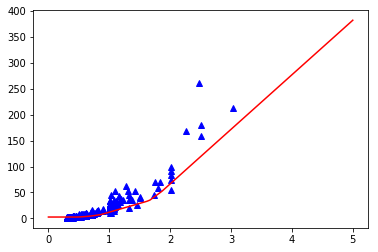

epoch: 500 loss:56.744262695


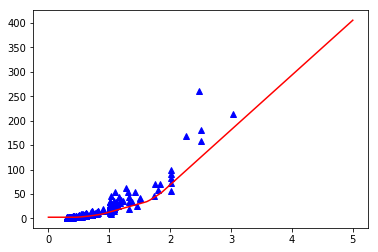

epoch: 600 loss:52.340370178


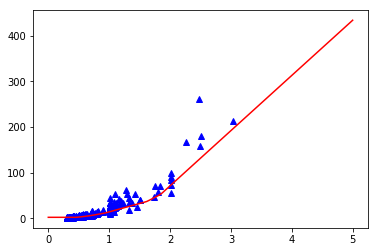

epoch: 700 loss:47.186962128


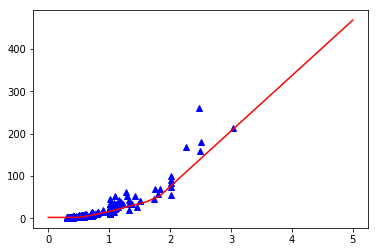

epoch: 800 loss:38.362689972


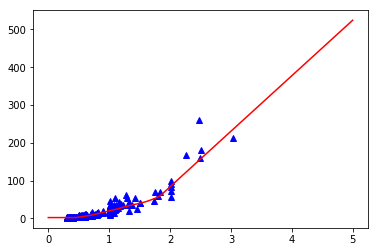

epoch: 900 loss:38.078945160


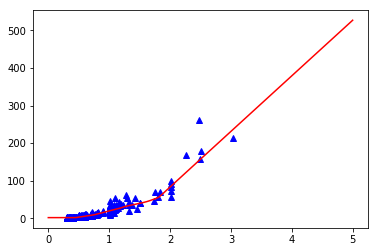

epoch: 1000 loss:37.521076202


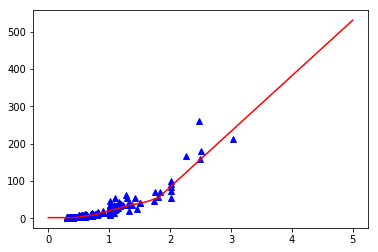

epoch: 1100 loss:37.038440704


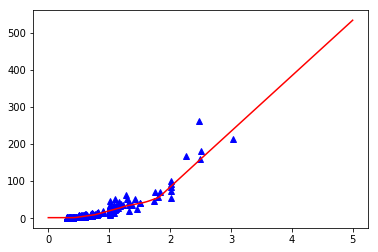

epoch: 1200 loss:36.887538910


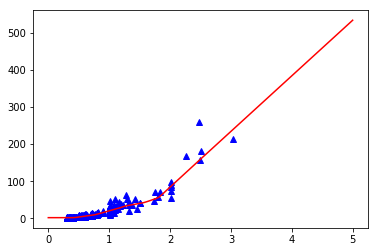

epoch: 1300 loss:36.466941833


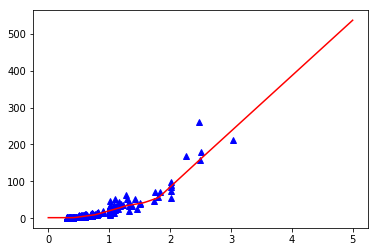

epoch: 1400 loss:36.225055695


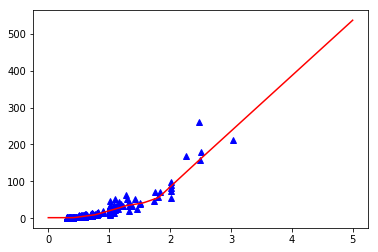

epoch: 1500 loss:36.519584656


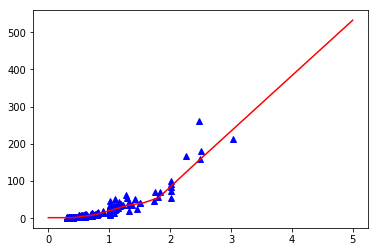

epoch: 1600 loss:36.884983063


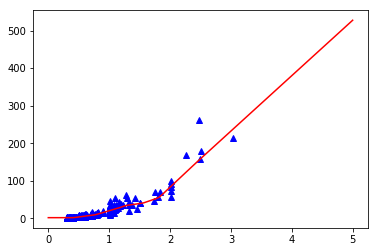

epoch: 1700 loss:36.713920593


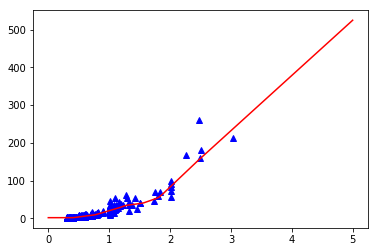

epoch: 1800 loss:36.617729187


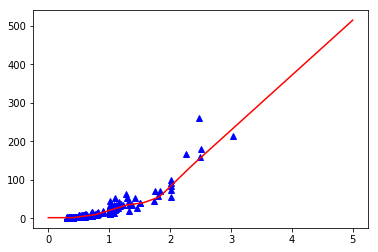

epoch: 1900 loss:37.779090881


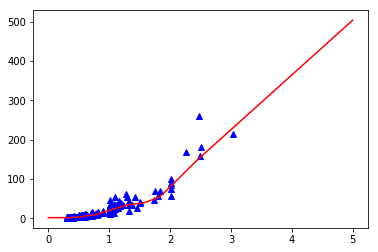

epoch: 2000 loss:37.218402863


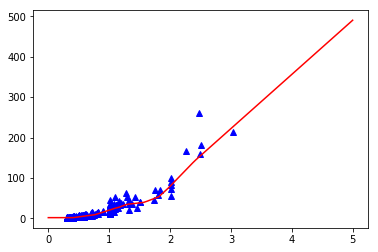

epoch: 2100 loss:37.973415375


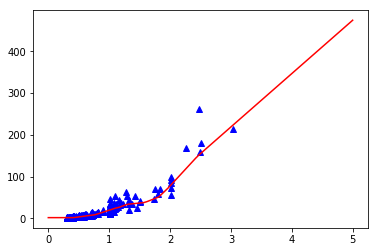

epoch: 2200 loss:40.794441223


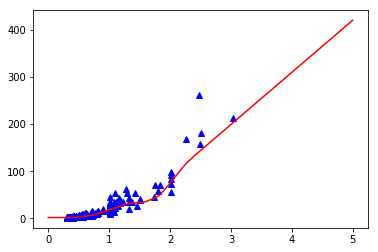

epoch: 2300 loss:41.403594971


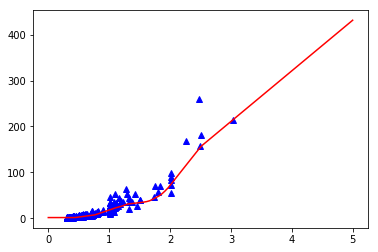

epoch: 2400 loss:44.199199677


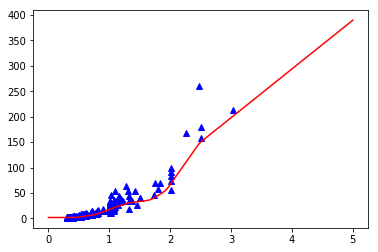

epoch: 2500 loss:45.026027679


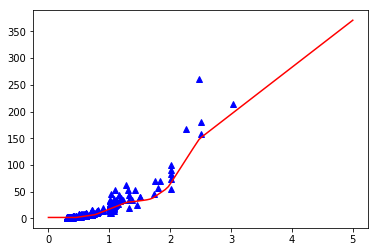

epoch: 2600 loss:42.381343842


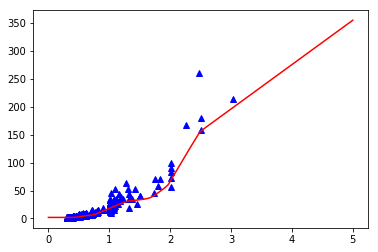

epoch: 2700 loss:44.427143097


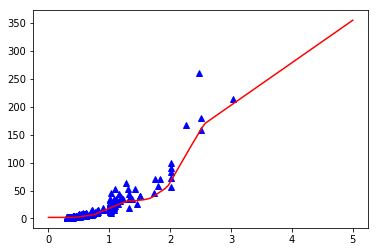

epoch: 2800 loss:37.931324005


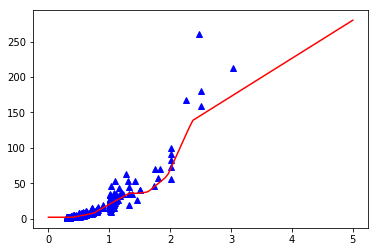

epoch: 2900 loss:38.657611847


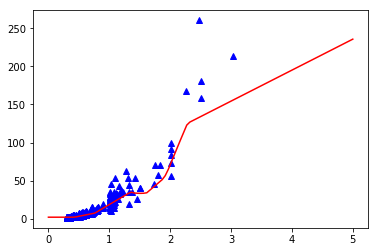

In [9]:
for epoch in range(3000):
    l_, _ = sess.run([loss, train], feed_dict={x:x_train, y:y_train})
    if epoch%100 == 0:
        print('epoch: %d'%epoch, 'loss:%.9f'%l_)
#         x_draw = np.zeros((100, 9+8))
#         x_draw[:, 0] = 1
#         x_draw[:, 9] = 1
#         x_draw = np.hstack((x_draw, np.linspace(0, 5, 100)[:,np.newaxis]))
        x_draw = np.linspace(0, 5, 100)[:,np.newaxis]
        y_draw = sess.run(hypothesis, feed_dict={x:x_draw})
        plt.cla()
        plt.plot(x_train, y_train, "b^")
        plt.plot(x_draw, y_draw, "r-")
        plt.pause(0.1)
    